# `AA` - Workshop 7

## `Logistic Regression`

Logistic regression results from choosing the logistic loss
\begin{equation}
\ell_{\mathrm{logistic}}(h_\theta(x), y) = \log(1+\exp(-h_\theta(x) \cdot y))
\end{equation}
as our classification loss to minimize.  Logistic regression also has a nice probabilistic interpretation: certain quantities give the _probability_, under a particular model, of an example being positive or negative. We will consider this probabilistic setting more in a later lecture, but for now we are going to simply treat it an another loss minimization algorithm.

Assuming a linear hypothesis function (the typical assumption under logistic regression), the partial deriative of the logistic loss is given by
\begin{equation}
\begin{split}
\frac{\partial}{\partial \theta_j} \log(1+\exp(-\theta^T x \cdot y)) & = \frac{1}{1+\exp(-\theta^T x \cdot y)} \frac{\partial}{\partial \theta_j} (1+\exp(-\theta^T x \cdot y))\\  
& = - \frac{\exp(-\theta^T x \cdot y)}{1+\exp(-\theta^T x \cdot y)} x_j\cdot y \\
& = -\frac{1}{1+\exp(\theta^T x \cdot y)} x_j\cdot y
\end{split}
\end{equation}
where in the last line we use the fact that
\begin{equation}
\frac{\exp(-x)}{1+\exp(-x)} = \frac{\exp(-x)}{1+\exp(-x)} \cdot \frac{\exp(x)}{\exp(x)} = \frac{1}{1+\exp(x)}
\end{equation}


Thus, the gradient of the entire objective function for logistic regression (we'll omit any regularization term, though we could also add this if desired) is given by

\begin{equation}
\begin{split}
\nabla_\theta E(\theta) & = 
\nabla_\theta \frac{1}{m} \sum_{i=1}^m \log \left (1+ \exp \left (\theta^T x^{(i)} \cdot y^{(i)} \right )\right) \\
& = \frac{1}{m} \sum_{i=1}^m -x^{(i)} y^{(i)} \frac{1}{1+\exp\left(\theta^T x^{(i)} \cdot y^{(i)}\right)}.
\end{split}
\end{equation}

We can use this derivation to write the gradient descent procedure for logistic regression, which differs in only two lines (the loss and gradient computation) from the support vector machine implementation.

For the purpose of this exercise, however, we will use the readily available `LogisticRegression` class in scikit learn.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [6]:
def plot_classification_sklearn(model, norm):
    x_range = [0,2600]
    y_range = [0, 0.21]
    plt.figure(figsize = (10,8))
    
    # plot classifcation regions
    grid=200
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),  # create coordinate mesh
                        np.linspace(y_range[0], y_range[1], grid))
    
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    zz = model.decision_function(norm.transform(X_)).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-float("inf"),0,float("inf")],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')

    s1 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='M']['area_mean'], cancer_df[cancer_df["diagnosis"]=='M']['concave points_mean'], marker='x', color='C0')
    s2 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='B']['area_mean'], cancer_df[cancer_df["diagnosis"]=='B']['concave points_mean'], marker='+', color='C3')    
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2],['Malignant', 'Benign'])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

cancer_df = pd.read_csv("../data/breast_cancer.csv", index_col = "id")
X = np.array(cancer_df[['area_mean','concave points_mean']])
Y = cancer_df['diagnosis'].values

norm = StandardScaler()
X_norm = norm.fit_transform(X)  # simultaneously fit and transform 

model_log = LogisticRegression(C=1e3)   # C is a regularization term, we set it to 1000 here
model_log.fit(X_norm, Y)

LogisticRegression(C=1000.0)

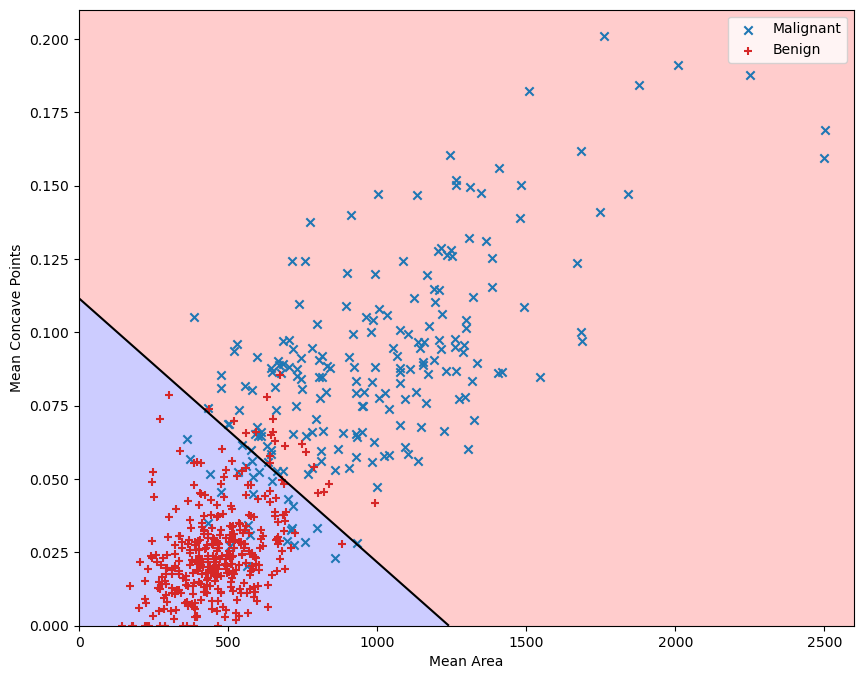

In [8]:
plot_classification_sklearn(model_log, norm)

How well does Logistic Regression perform? Let us look at accuracy.

In [9]:
(model_log.predict(norm.transform(X)) == Y).mean()  # Note: mean() operation on booleans returns the proportion of True

0.9191564147627417

**Task**: In the above we used just two features to classify the cancer cells. We achieved decent accuracy of >90%. Can we impove performance even further by including more information, i.e. more features?

In [10]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
# YOUR CODE HERE

X_full = np.array(cancer_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])

Y = cancer_df['diagnosis'].values

#Transform
norm_full = StandardScaler()
X_norm_full = norm_full.fit_transform(X_full)


In [21]:
# train new model_SVM

model_SVM_full = LinearSVC(loss='hinge')
model_SVM_full.fit(X_norm_full,Y)

# return acuracy
(model_SVM_full.predict(X_norm_full) == Y).mean()

0.9876977152899824

In [22]:
# train new logistic model

model_log_full = LogisticRegression(C=1e3)
model_log_full.fit(X_norm_full,Y)

# return acuracy
(model_log_full.predict(X_norm_full) == Y).mean()

0.9929701230228472

## `Evaluating Classification models`

### Confusion Matrix

Confusion Matrix plots true negatives (TN) and true positives (TP) vs. false negatives (FN) and false positives (FP). What results is a 2x2 matrix that provides an overview of classifier performance. See the [Wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix) for more info.

Let us have a look at how this looks for our just learned model, the logistic regression prediction (`model_log`).

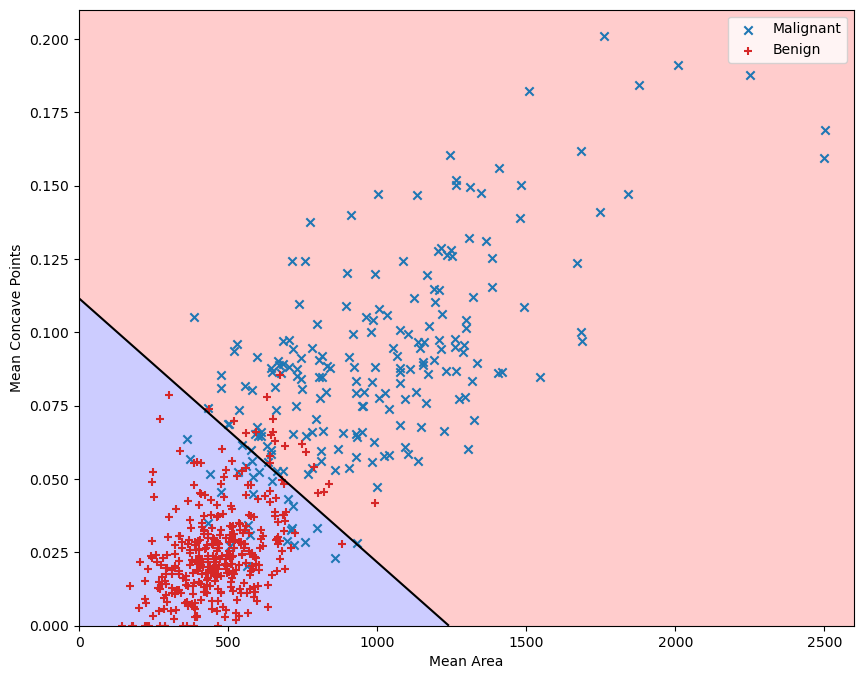

In [13]:
plot_classification_sklearn(model_log, norm)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, model_log.predict(X_norm),labels=["B","M"])
print(confusion_matrix)

[[337  20]
 [ 26 186]]


Rows of the confusion matrix indicate **actual** values, while colums indicate **predicted** values. The `labels` argument allows us to order the confusion matrix. Setting it to `labels = ["M","B"]` ensures that the first row and first colum represent malignant entries. Therefor we get:

|  | Malignant | Begning |
| --- | --- | --- |
| Malignant | TP | FN |
| Begning | FP | TN |

From this confusion matrix various additional performance metrics can be derived. Let us consider some of the most common ones:



### Accuracy

Accuracy is the ratio of all correctly classified smaples vs. the total amount of samples. It is computed as follows:

\begin{equation}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

The scikit learn implementation is straight forward:

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(Y, model_log.predict(X_norm))
print(accuracy_score)

0.9191564147627417


Relating this back to the confusion matrix from above:

In [25]:
(337+186)/sum(sum(confusion_matrix))

0.9191564147627417

### Precision

Precision is the ratio of all correctly classified smaples vs. the total amount of samples. It is computed as follows:

\begin{equation}
Precision = \frac{TP}{TP+FP}
\end{equation}

The scikit learn implementation is as follows:

In [31]:
from sklearn.metrics import precision_score
precision_score = precision_score(Y, model_log.predict(X_norm), pos_label="B")
print(precision_score)

0.928374655647383


Relating this back to the confusion matrix from above:

In [30]:
(337)/(337+26)

0.928374655647383

### True Positive Rate (Recall)

Recall is the ratio of true positives vs. all actual positives. It is computed as follows:

\begin{equation}
Recall = \frac{TP}{TP+FN}
\end{equation}

The scikit learn implementation is as follows:

In [34]:
from sklearn.metrics import recall_score
recall_score = recall_score(Y, model_log.predict(X_norm), pos_label="B")
print(recall_score)

0.9439775910364145


Relating this back to the confusion matrix from above:

In [33]:
(337)/(337+20)

0.9439775910364145

### ROC and Precision-Recall Curve
Two other common evaluation metrics are [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and [precision-recall curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html). You can read up about them in the scikit learn documentation.

In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

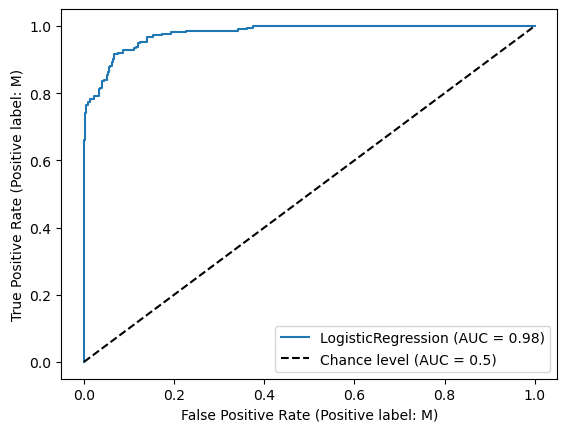

In [46]:
RocCurveDisplay.from_estimator(model_log, X_norm, Y, plot_chance_level=True)

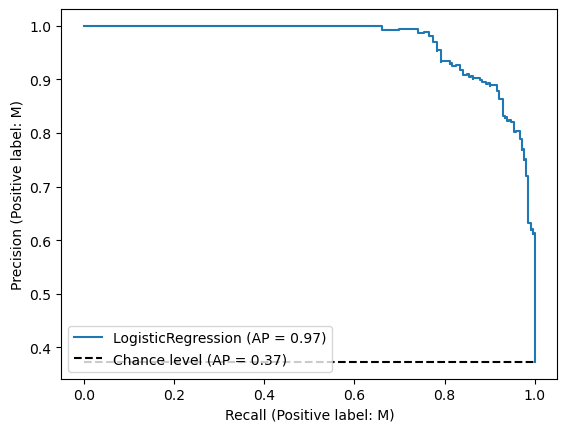

In [61]:
PrecisionRecallDisplay.from_estimator(model_log, X_norm, Y, plot_chance_level=True)

**Excercise**: Why is the chance level precision not at 50%? Does it have to do with the data or the model? Try to achieve a 50% precision rate in the above figure!

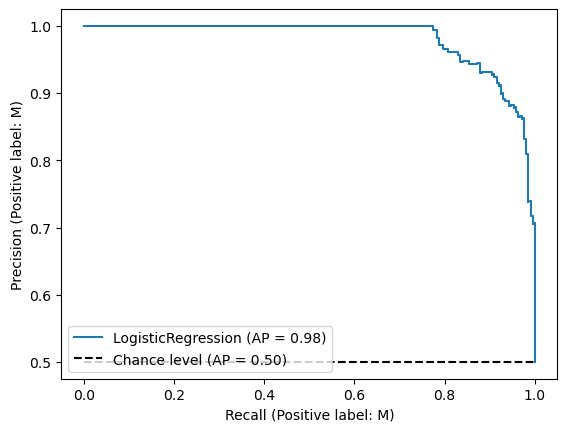

In [77]:
# taken from https://stackoverflow.com/a/54930654/

from sklearn.utils import resample
df_majority = cancer_df[cancer_df['diagnosis']=='B']
df_minority = cancer_df[cancer_df['diagnosis']=='M']

# undersample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=len(df_minority),    # to match minority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
cancer_df_sampled = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
cancer_df_sampled.diagnosis.value_counts()

# fit model again
X_fake = np.array(cancer_df_sampled[['area_mean','concave points_mean']])
Y_fake = cancer_df_sampled['diagnosis'].values

norm = StandardScaler()
X_norm_fake = norm.fit_transform(X_fake)  # simultaneously fit and transform 

model_log_fakedata = LogisticRegression(C=1e3)   # C is a regularization term, we set it to 1000 here
model_log_fakedata.fit(X_norm_fake, Y_fake)

# plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(model_log_fakedata, X_norm_fake, Y_fake, plot_chance_level=True)

---